## Bringing things together - Application of what we've learned thus far

In this lecture we'll explore some applications of what we've learned how to do so far.

## Finding the zeros of equations

In lecture one we looked at writing down some equations in Python.  Now we'll make use of this ability to "find the zeros" of those equations - the values of our parameters such that the function is equal to zero or a tuple of zeros, for multivariate equations.

## Single variable equations

First let's look at how to deal with this for equations of a single variable.  These equations will be of the form:

`f(x) = a*x + b`

Notice we'll only consider linear equations for now.

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def equation_one(x):
    return x

def find_zero_eq_one():
    for i in range(-100, 100):
        if equation_one(i) == 0:
            return i
        
print("The 'zero' for equation one is", find_zero_eq_one())

The 'zero' for equation one is 0


In order to find the zero, we simply try a bunch of different numbers.  And if our condition of the zero being found ever happens to be right, we return.  This first example was of course trivial.  Let's see if we can make it more complex!

In [10]:
def equation_two(x):
    return x + 7

def find_zero_eq_two():
    for i in range(-100, 100):
        if equation_two(i) == 0:
            return i
        
print("The 'zero' for equation two is", find_zero_eq_two())

The 'zero' for equation two is -7


For this slightly more complex equation things get a little more interesting!  Now we have a `x` that gives `f(x) = 0` that is not zero itself!  Let's see if this zero finding method will always hold up.

In [1]:
def equation_three(x):
    return 5*x + 7

def find_zero_eq_three():
    for i in range(-100, 100):
        if equation_three(i) == 0:
            return i
        
print("The 'zero' for equation three is", find_zero_eq_three())

The 'zero' for equation three is None


As you can see we fail to find the right solution to equation three.  Is that because our search method is fundamentally flawed?  In fact it is not!  The problem here is that we are 'skipping' over the solution.  Notice that our equation now has a coefficient on the x.  This means that the 'solution' will likely be a rational number, not a natural number.  Therefore we'll need to include the rational numbers in our search space.

But how can we do that?  Let's see if the range function can be helpful here:

In [2]:
help(range)

Help on class range in module builtins:

class range(object)
 |  range(stop) -> range object
 |  range(start, stop[, step]) -> range object
 |  
 |  Return an object that produces a sequence of integers from start (inclusive)
 |  to stop (exclusive) by step.  range(i, j) produces i, i+1, i+2, ..., j-1.
 |  start defaults to 0, and stop is omitted!  range(4) produces 0, 1, 2, 3.
 |  These are exactly the valid indices for a list of 4 elements.
 |  When step is given, it specifies the increment (or decrement).
 |  
 |  Methods defined here:
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(self, key, /)
 |      Return self[key].
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |

In [12]:
for i in range(0, 10, 0.1):
    print(i)

TypeError: 'float' object cannot be interpreted as an integer

Oh no!  The range function only takes integer values for the step size!  Is there any recourse?!  

It turns out we can make use of the range function we implemented last lecture to achieve the desired result!

In [3]:
def arange(start, stop, step):
    iterator = start
    while iterator < stop:
        yield iterator
        iterator += step

def equation_three(x):
    return 5*x + 7

def find_zero_eq_three():
    for i in arange(-10, 10, 0.01):
        if equation_three(i) == 0:
            return i
        
print("The 'zero' for equation three is", find_zero_eq_three())

The 'zero' for equation three is None


In [3]:
1.4 == 1.4

True

In [5]:
quotient = -7/5

-1.4

In [7]:
summation = -1.3 
for i in range(10):
    summation -= 0.001
summation

-1.309999999999999

In [4]:
for i in arange(-10, 0, 0.01):
    if i == -7/5:
        print(i)

In [7]:
epsilon = 0.01
value = -7/5
for i in arange(-10, 0, 0.01):
    if abs(i - value) < epsilon:
        print(i)

-1.40000000000017
-1.39000000000017


In [6]:
value

-1.4

In [9]:
for i in arange(-10, 0, 0.01):
    if round(i, 2) - round(value, 2) == 0:
        print(round(i, 2))

-1.4


We still fail to find the 'zero' even with a far more granular search space.  The reason for this is because of the nature of floating point numbers, they are inherently inprecise.  In fact, our arange function does contain approximately the right answer, which happens to be -7/5 (or -1.4).  

The right thing to do is allow for a little bit of error, since we'll never get a precise solution.  So now we'll add an `episolon` term to our `find_zero_eq_three()` which will allow us to get "close enough".

In [39]:
def arange(start, stop, step):
    iterator = start
    while iterator < stop:
        yield iterator
        iterator += step

def equation_three(x):
    return 5*x + 7

def find_zero_eq_three(episolon):
    for i in arange(-10, 10, 0.01):
        if abs(equation_three(i)) < episolon:
            return i
        
print("The 'zero' for equation three is", find_zero_eq_three(0.01))

The 'zero' for equation three is -1.40000000000017


Success!  We found the zero!  We are now in a position to move to the two variable case!

In [11]:
def arange(start, stop, step):
    iterator = start
    while iterator < stop:
        yield iterator
        iterator += step

        
def equation_four(x, y):
    return 5*x + 4*y + 7


def find_zero_eq_four(episolon):
    for i in arange(-10, 10, 0.1):
        for j in arange(-10, 10, 0.1):
            if abs(equation_four(i, j)) < episolon:
                return (i, j)
        
print("The 'zero' for equation four is", find_zero_eq_four(0.01))

The 'zero' for equation four is (-9.400000000000002, 9.999999999999963)


In [12]:
def arange(start, stop, step):
    iterator = start
    while iterator < stop:
        yield iterator
        iterator += step

        
def equation_four_plus(x, y, z):
    return 5*x + 4*y + 8*z + 7


def find_zero_eq_four_plus(episolon):
    for i in arange(-10, 10, 0.1):
        for j in arange(-10, 10, 0.1):
            for k in arange(-10, 10, 0.1):
                if abs(equation_four_plus(i, j, k)) < episolon:
                    return (i, j, k)
        
print("The 'zero' for equation four plus is", find_zero_eq_four_plus(0.01))

The 'zero' for equation four plus is (-9.8, -9.500000000000002, 9.999999999999963)


As you can see, there wasn't a ton of difference here.  The largest being that now we need 2 for loops, in order to find the zeros.  Let's see if we can generalize out to the case with n variables.

In [8]:
sum([1,2,3])

6

In [ ]:
from functools import partial
import itertools


def arange(start, stop, step):
    iterator = start
    while iterator < stop:
        yield iterator
        iterator += step

        
def equation_five(coefficients, constant, variables):
    return sum([coefficients[index]*variables[index] 
                for index in range(len(variables))]) + constant


def find_zero_eq_five(coefficients, constant, episolon):
    eq_five = partial(equation_five, coefficients, constant)
    value_range = list(arange(-10, 10, 0.1))
    values = list(itertools.permutations(value_range, len(coefficients)))
    for value in values:        
        if abs(eq_five(value)) < episolon:
                return value

print(find_zero_eq_five([1], 7, 0.1))
print(find_zero_eq_five([1, 2], 7, 0.1))
print(find_zero_eq_five([1, 2, 3], 7, 0.1))
print(find_zero_eq_five([1, 2, 3, 4], 7, 0.1))

(-7.000000000000011,)
(-10, 1.4999999999999816)


In order to get this to run with any kind of speed I had to cheat a little and use something we haven't introduced yet.  So for completeness, I include an implementation of the function `itertools.permutations`

In [9]:
def all_perms(elements):
    if len(elements) <=1:
        yield elements
    else:
        for perm in all_perms(elements[1:]):
            for i in range(len(elements)):
                # nb elements[0:1] works in both string and list contexts
                yield perm[:i] + elements[0:1] + perm[i:]
                
list(all_perms([1, 2, 3]))

[[1, 2, 3], [2, 1, 3], [2, 3, 1], [1, 3, 2], [3, 1, 2], [3, 2, 1]]

Great!  So now we have a linear solver!  Unfortunately, it doesn't run very fast.  The running time of this search is `O(n^number of variables)`.  To get a better sense of what I mean by this, let's formally introduce Big-OH notation.  

The running time of any piece of code can be defined by it's lower bound running time, it's upper bound running time, and it's average running time.  Because most computer scientists only care about how an algorithm does in it's worst case, we will only consider the worst case running time here.

Informally, a running time is defined as the number of instructions required to execute the code. Let's look at an example:

In [3]:
def func(n):
    return n + 1

func(100)

101

The running time of func is O(1) because it runs in one instruction.

In [1]:
def func(n):
    x = 0
    for i in range(n):
        x += 1
    return x

func(1000)

1000

The running time of func is `O(n)` because it takes n instructions to run func.  Let's look at another example:

In [2]:
def func(n):
    x = 0
    for i in range(n):
        for j in range(n):
            x += 1
    return x

func(1000)

1000000

The running time of func is O(n^2) because it takes n^2 instructions to run func.  The general rule of thumb is the number of inner loops determines the magnitude of the running time.

In [1]:
def fib(n):
    if n == 0:
        return 1
    if n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)

fib(5)

8

What is the running time for something like this?  To figure it out we'll have to look at how many operations are called as `n` - the size of the fibonacci number we care about.  In order to do this we augment `fib` to explicitly tell us how many computations it runs.

In [4]:
def fib(n, count):
    if n == 0:
        return 1, count+1
    if n == 1:
        return 1, count+1
    else:
        val_one, count = fib(n-1, count)
        val_two, count = fib(n-2, count)
        return val_one+val_two, count+1
    
fib(5, 0)

(8, 15)

As you can see here, to get the 5th fibonacci number requires 15 instructions.  Let's see how this scales as `n` increases.

In [5]:
fib_count = []
for i in range(20):
    fib_count.append(fib(i, 0))

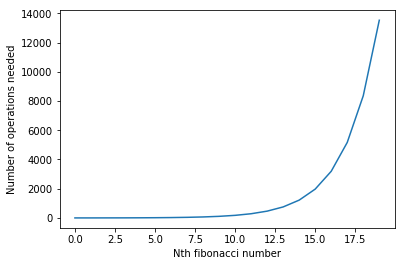

In [12]:
x = list(range(len(fib_count)))
y = [elem[1] for elem in fib_count]
plt.plot(x, y)
plt.xlabel("Nth fibonacci number")
plt.ylabel("Number of operations needed")
plt.show()

As you can see as the size of n grows, the number of operations needed grows exponentially.  So how do we quantify this exactly?

It turns out the answer is `O(2^n)`.  This is because for every call there are 2 operations.  While it might appear like this should only be `O(2*n)` because this happens _at every step_ the calls compound into an exponential running time.

For a precise analysis of the running time check out this great explanation: https://www.geeksforgeeks.org/time-complexity-recursive-fibonacci-program/

## Writing a faster solver

Now that we have a sense for Big-OH running times and we know approximately what we mean by a linear running time solver, let's see if we can do better!

In order to do better we'll try to write a solver that takes log-linear time to find the zero of our equation.  For this we'll be using something called a divide and conquer algorithm.  

Before we can write our log-linear solver we'll need a quick digression into if/elif/else statements.

In [28]:
x = 17
if x == 7:
    print("hello")
elif x == 8:
    print("yea okay")
elif x == 9:
    print("right...")
elif x == 17:
    print("we figured it out?")
else:
    print("got it")

we figured it out?


As you can see, we can have arbitrarily many `elif` statements between the `if` and the `else`.  We can think of these `elif` as "else if" statements.  So logically it flows as follows (from the above example):

```
if x equals 7 print hello
else if x equals 8 print yea okay
else if x equals 9 print right...
else if x equals 17 print we figured it out?
else print got it
```

The else if convention mentions that all the conditions will be checked sequentially.  So if the first `elif` statement happens to be true, the remaining conditions won't execute.  Therefore order of `elif` statements matters.

Now that we have that out of the way, let's talk about binary search!

In [1]:
def equation_six(x):
    return x

def find_zero_eq_six(val):
    if equation_six(val) > 0:
        val -= 1
        return find_zero_eq_six(val)
    elif equation_six(val) < 0:
        val += 1
        return find_zero_eq_six(val)
    else:
        return val
    
print("The 'zero' for equation six is", find_zero_eq_six(10))

The 'zero' for equation six is 0


In [5]:
from functools import partial

def equation_six(x):
    return x

def find_zero_eq_six(val, func):
    if func(val) > 0:
        val -= 1
        return find_zero_eq_six(val, func)
    elif func(val) < 0:
        val += 1
        return find_zero_eq_six(val, func)
    else:
        return val
    
print("The 'zero' for equation six is", find_zero_eq_six(10, partial(lambda x, y: y, 5)))

The 'zero' for equation six is 0


This simple looking equation is what's called binary search a specific way of solving "hard" problems with recursion.  This is the one place where it doesn't matter much to transform from the recursive to the iterative case, because the fundamental algorithm computes things "fast enough".  This is because the algorithm we describe here has a running time of `O(log n)`, one of the fastest possible running times of any algorithm.

Now that we have something fast, let's see how it does when we start dealing with more sophisticated equations.

In [2]:
from functools import partial


def equation_seven(x):
    return 5*x + 7


def binary_search_solver(eq, val, epsilon=0.001, step_size=0.1):
    if abs(eq(val)) < epsilon:
        return val
    elif eq(val) > 0:
        val -= step_size
        return binary_search_solver(eq, val)
    elif eq(val) < 0:
        val += step_size
        return binary_search_solver(eq, val)
    else:
        return val
    

solver = partial(binary_search_solver, equation_seven)
solver(10)

-1.3999999999999815

As a general claim, the above solver will work on an polynomial func of one variable, regardless of how complex.  One of the really important things in this solver is initialization - yes we need to give our equation a start value, but we don't have to provide a range!  This is a huge improvement of having to search the entire space of values and hoping we get lucky.  

Now our solver is smart enough to figure out what direction to go!  All with some simple if/elif/else statements.

Let's see if we can generalize out our solver to the two variable case.

In [48]:
from functools import partial
from random import randint


def equation_eight(x, y):
    return 5*x + 7*y + 4


def arange(start, stop, step):
    iterator = start
    while iterator < stop:
        yield iterator
        iterator += step

        
def solver(eq, val, epsilon=0.1, step_size=0.01):
    if abs(eq(val)) < epsilon:
        return val
    elif eq(val) > 0:
        val -= step_size
        return solver(eq, val)
    elif eq(val) < 0:
        val += step_size
        return solver(eq, val)
    else:
        return val

    
def two_variable_solver():
    solutions = []
    for i in arange(-10, 10, 0.1):
        eq = partial(equation_eight, i)
        solutions.append((i, solver(eq, 0)))
    return solutions
    
        
two_variable_solver()

[(-10, 6.559999999999905),
 (-9.9, 6.489999999999906),
 (-9.8, 6.419999999999908),
 (-9.700000000000001, 6.349999999999909),
 (-9.600000000000001, 6.2799999999999105),
 (-9.500000000000002, 6.209999999999912),
 (-9.400000000000002, 6.129999999999914),
 (-9.300000000000002, 6.059999999999915),
 (-9.200000000000003, 5.989999999999917),
 (-9.100000000000003, 5.919999999999918),
 (-9.000000000000004, 5.84999999999992),
 (-8.900000000000004, 5.779999999999921),
 (-8.800000000000004, 5.709999999999923),
 (-8.700000000000005, 5.629999999999924),
 (-8.600000000000005, 5.559999999999926),
 (-8.500000000000005, 5.489999999999927),
 (-8.400000000000006, 5.419999999999929),
 (-8.300000000000006, 5.34999999999993),
 (-8.200000000000006, 5.279999999999932),
 (-8.100000000000007, 5.209999999999933),
 (-8.000000000000007, 5.129999999999935),
 (-7.9000000000000075, 5.0599999999999365),
 (-7.800000000000008, 4.989999999999938),
 (-7.700000000000008, 4.9199999999999395),
 (-7.6000000000000085, 4.84999999

Because our binary search solver is so fast, we can actually find _all the zeros_ of equation between -10 and 10.  Previously we just found the first one.  

The reason there are multiple zeros is because for each choice of the variable x, there is a different y that will "zero" out the equation.  It turns out that this zero "plane" of the function is in fact infinitely big!

The above solver certainly "works" but it's still got some iteration.  Let's see if we can get rid of that.


In [49]:
from functools import partial
from random import random


def equation_nine(x, y):
    return 5*x + 7*y + 4

        
def solver(eq, val_one, val_two, epsilon=0.1):
    if abs(eq(val_one, val_two)) < epsilon:
        return val_one, val_two
    elif eq(val_one, val_two) > 0:
        val_one -= random()
        val_two -= random()
        return solver(eq, val_one, val_two)
    elif eq(val_one, val_two) < 0:
        val_one += random()
        val_two += random()
        return solver(eq, val_one, val_two)
    else:
        return val_one, val_two    
        
solver(equation_nine, 0, 0)

(-0.08541874670272764, -0.5205367749532717)

In [13]:
from random import random

random()

0.1085661397290012

It may appear as though this solver isn't as strong, because it doesn't get us all the values.  But!  We can just iterate and recover as many zeros as we like.  Additionally, because we binary search over all values, this is blazingly fast.  

Some other things to consider - this means generalizing is _easy_.  Let's do that for completeness.

In [18]:
from random import random
from functools import partial


def equation_ten(coefficients, constant, variables):
    return sum([coefficients[index]*variables[index] 
                for index in range(len(variables))]) + constant


def gen_solver(eq, values, epsilon=0.1):
    if abs(eq(values)) < epsilon:
        return values
    elif eq(values) > 0:
        values = [elem - random() 
                  for elem in values]
        return gen_solver(eq, values)
    elif eq(values) < 0:
        values = [elem + random()
               for elem in values]
        return gen_solver(eq, values)
    else:
        return values   

    
def setup_solver(coefficients, constant, epsilon):
    eq = partial(equation_ten, coefficients, constant)
    values = [0 for _ in range(len(coefficients))]
    return gen_solver(eq, values, epsilon=epsilon)
    
zeros = []
for _ in range(10):        
    zeros.append(setup_solver([1,2,3,4,5, 6], 7, 0.1))
print(zeros)

[[-1.746439251136926, 3.6461844225369084, -5.039274448627325, -5.272960145020748, -1.2483224246905444, 4.972900491751486], [-1.0603466992362178, -2.8160944441976303, 0.22878359910322732, -0.17370119731341094, 0.16778759188437298, -0.18326066907389094], [-3.5653199222182073, -4.709396060919291, 1.321765827384867, 3.7036662574251897, -0.006510314360145153, -2.120724091792442], [-1.669122966434602, -3.4631840020097195, 6.856611950414922, 1.9843652357300714, -1.8429838027652505, -2.9476205115171417], [1.5489742116929057, -0.9019211320283123, 4.6746885617130385, 1.4970686712404406, -2.3629550520518428, -2.4929113176998654], [-2.307194558307179, 0.6966673507513614, 0.8728918591589837, 1.016750417106464, -0.3634573731036945, -1.812398501342844], [-2.3891963530106652, -1.654620314989021, 3.0875639040332508, -2.069807116319476, 3.700202254433464, -3.462163544169754], [0.9889994048658489, 1.2286384914811106, -2.1376861922177333, -2.2054738576023967, -0.3468279835009822, 1.1013083055398458], [-0.

Now we have a general fully recursive and blazing fast general polynomial solver of "n" variables!  And we did it 23 lines of code.  _This_ is the power of Python.  Fast and elegant solutions that generalize.